In [10]:
from generator import belief_generator
import numpy as np

init = belief_generator(agent_num=10, topic_num=3, export=True)

🔹 Experiment seed: 4168538993
✅ Saved initial belief X0 to ./simulations/20251027_132008/X0.csv
✅ Saved W matrix to: ./simulations/20251027_132008\W.csv
✅ Exported Gephi network to: ./simulations/20251027_132008\W.gexf
✅ Saved baseline C_base to: ./simulations/20251027_132008\C_base.csv
✅ Saved logic tensor (C_i) to ./simulations/20251027_132008/C_tensor.npy

🎯 All components generated successfully.


Loaded data: X0(10, 3), W(10, 10), C(10, 3, 3)
Simulation complete: trajectory shape = (31, 10, 3)


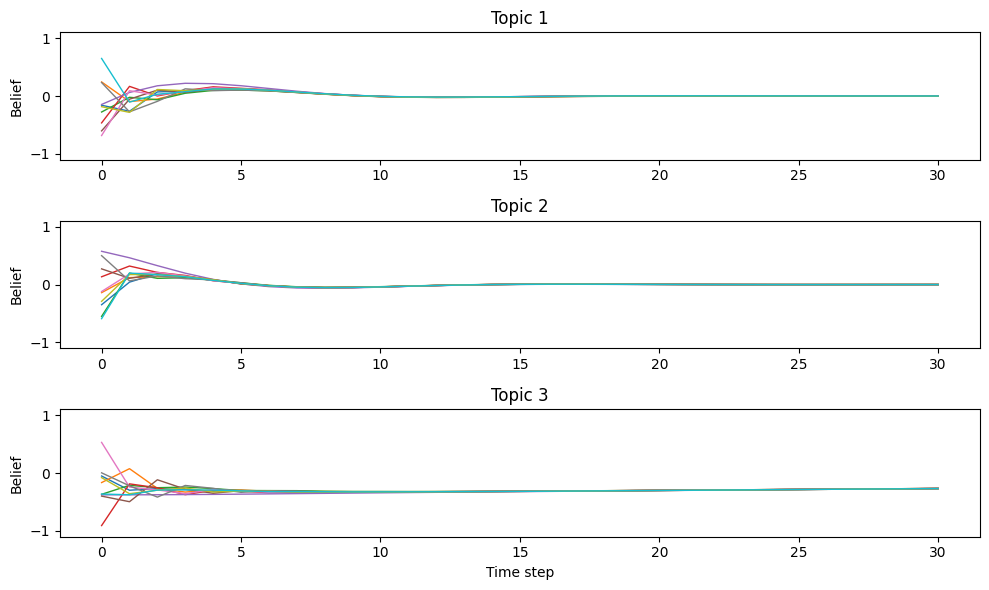

In [ ]:
# belief_simulation.py
import numpy as np
import matplotlib.pyplot as plt


from generator import belief_generator
import numpy as np

init = belief_generator(agent_num=10, topic_num=3, export=True)

# ============================================================
# Step 1. 加载数据
# ============================================================
X0 = init['X0']
W = init['W']
C_tensor = np.array(init['C_obj'].C_list)

n, m = X0.shape
print(f"Loaded data: X0{X0.shape}, W{W.shape}, C{C_tensor.shape}")

# ============================================================
# Step 2. 定义模拟函数
# ============================================================
def simulate(W, C, X0, T=30):
    """
    信念传播迭代：
    x_i(t+1) = C_i * Σ_j w_ij * x_j(t)
    """
    X = X0.copy()
    trajectory = [X]

    for t in range(T):
        influence = W @ X                   # (n × m)
        X_next = np.einsum("nij,nj->ni", C, influence)
        trajectory.append(X_next)
        X = X_next

    return np.array(trajectory)             # (T+1, n, m)

# ============================================================
# Step 3. 执行模拟
# ============================================================
T = 30
trajectory = simulate(W, C_tensor, X0, T=T)
print(f"Simulation complete: trajectory shape = {trajectory.shape}")

# ============================================================
# Step 4. 绘制结果
# ============================================================
def plot_trajectories(trajectory, m=3, agents_to_show=None):
    """绘制信念随时间的变化轨迹"""
    n = trajectory.shape[1]
    if agents_to_show is None:
        agents_to_show = range(min(5, n))   # 默认显示前5个个体
    time_axis = np.arange(trajectory.shape[0])

    plt.figure(figsize=(10, 6))
    for topic in range(m):
        plt.subplot(m, 1, topic + 1)
        for agent in agents_to_show:
            plt.plot(time_axis, trajectory[:, agent, topic], lw=1)
        plt.title(f"Topic {topic+1}")
        plt.ylabel("Belief")
        plt.ylim(-1.1, 1.1)
        if topic == m - 1:
            plt.xlabel("Time step")
    plt.tight_layout()
    plt.show()

plot_trajectories(trajectory, m=m, agents_to_show=range(10))


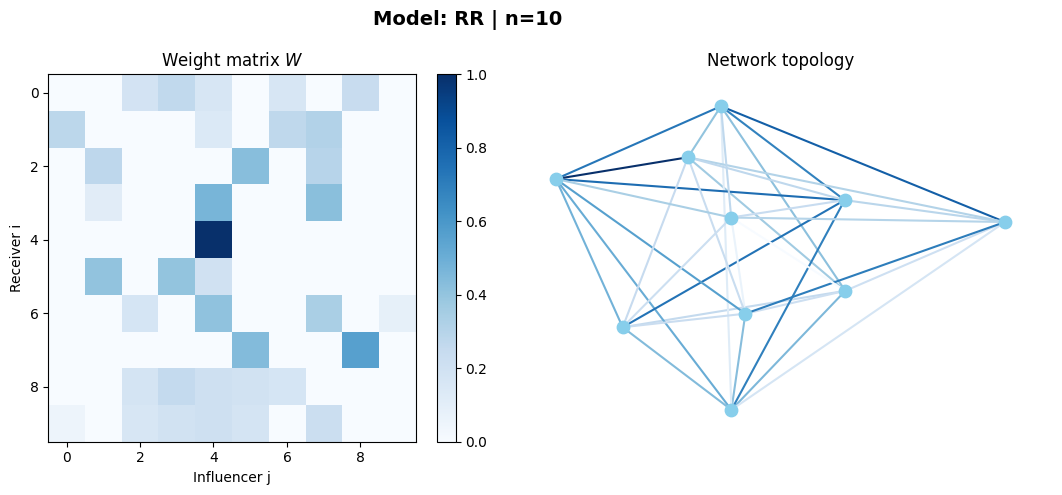

In [12]:
W_obj = init['W_obj']
W_obj.visualize()